# Anomaly Detection on NSl-KDD dataset

In [1]:
## Mounting the google drive on which data is stored
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
## Loading the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

## 1.1 Loading the Dataset

In [3]:
# Loading the dataset
train_data = pd.read_csv('drive/MyDrive/netSecurity/NSL-KDD/KDDTrain+.txt', sep=',', header= None)
test_data = pd.read_csv('drive/MyDrive/netSecurity/NSL-KDD/KDDTest+.txt', sep=',', header= None)
## Combining both datasets
data = pd.DataFrame(np.concatenate((train_data, test_data), axis=0))

In [4]:
## Getting an overview of the dataset
data.head()

0    1         2   3    4     5  6  7  8  9   ...    33    34    35    36  \
0  0  tcp  ftp_data  SF  491     0  0  0  0  0  ...  0.17  0.03  0.17   0.0   
1  0  udp     other  SF  146     0  0  0  0  0  ...   0.0   0.6  0.88   0.0   
2  0  tcp   private  S0    0     0  0  0  0  0  ...   0.1  0.05   0.0   0.0   
3  0  tcp      http  SF  232  8153  0  0  0  0  ...   1.0   0.0  0.03  0.04   
4  0  tcp      http  SF  199   420  0  0  0  0  ...   1.0   0.0   0.0   0.0   

     37    38    39    40       41  42  
0   0.0   0.0  0.05   0.0   normal  20  
1   0.0   0.0   0.0   0.0   normal  15  
2   1.0   1.0   0.0   0.0  neptune  19  
3  0.03  0.01   0.0  0.01   normal  21  
4   0.0   0.0   0.0   0.0   normal  21  

[5 rows x 43 columns]

There are no feature so let us overlay feature names on this dataset too.

In [5]:
## Getting the features
features = pd.read_csv('drive/MyDrive/netSecurity/NSL-KDD/Field Names.csv', sep=',')
features

duration  continuous
0                 protocol_type    symbolic
1                       service    symbolic
2                          flag    symbolic
3                     src_bytes  continuous
4                     dst_bytes  continuous
5                          land  continuous
6                wrong_fragment  continuous
7                        urgent  continuous
8                           hot  continuous
9             num_failed_logins  continuous
10                    logged_in  continuous
11              num_compromised  continuous
12                   root_shell  continuous
13                 su_attempted  continuous
14                     num_root  continuous
15           num_file_creations  continuous
16                   num_shells  continuous
17             num_access_files  continuous
18            num_outbound_cmds  continuous
19                is_host_login  continuous
20               is_guest_login  continuous
21                        count  continuous
22                    srv_count  continuous
23                  serror_rate  continuous
24              srv_serror_rate  continuous
25                  rerror_rate  continuous
26              srv_rerror_rate  continuous
27                same_srv_rate  continuous
28                diff_srv_rate  continuous
29           srv_diff_host_rate  continuous
30               dst_host_count  continuous
31           dst_host_srv_count  continuous
32       dst_host_same_srv_rate  continuous
33       dst_host_diff_srv_rate  continuous
34  dst_host_same_src_port_rate  continuous
35  dst_host_srv_diff_host_rate  continuous
36         dst_host_serror_rate  continuous
37     dst_host_srv_serror_rate  continuous
38         dst_host_rerror_rate  continuous
39     dst_host_srv_rerror_rate  continuous

# 1.2 Overlaying feature names on the dataset

In [6]:
## Getting the feature names, some are missing in the file, so we have to add
## them manually
feaNames= np.array(features['duration'])
feaNames = np.insert(feaNames, 0, 'duration')
feaNames = np.append(feaNames, "attack")
feaNames = np.append(feaNames, "level")

## Overlaying features on the data
data.columns = feaNames
data.head()

duration protocol_type   service flag src_bytes dst_bytes land  \
0        0           tcp  ftp_data   SF       491         0    0   
1        0           udp     other   SF       146         0    0   
2        0           tcp   private   S0         0         0    0   
3        0           tcp      http   SF       232      8153    0   
4        0           tcp      http   SF       199       420    0   

  wrong_fragment urgent hot  ... dst_host_same_srv_rate  \
0              0      0   0  ...                   0.17   
1              0      0   0  ...                    0.0   
2              0      0   0  ...                    0.1   
3              0      0   0  ...                    1.0   
4              0      0   0  ...                    1.0   

  dst_host_diff_srv_rate dst_host_same_src_port_rate  \
0                   0.03                        0.17   
1                    0.6                        0.88   
2                   0.05                         0.0   
3                    0.0                        0.03   
4                    0.0                         0.0   

  dst_host_srv_diff_host_rate dst_host_serror_rate dst_host_srv_serror_rate  \
0                         0.0                  0.0                      0.0   
1                         0.0                  0.0                      0.0   
2                         0.0                  1.0                      1.0   
3                        0.04                 0.03                     0.01   
4                         0.0                  0.0                      0.0   

  dst_host_rerror_rate dst_host_srv_rerror_rate   attack level  
0                 0.05                      0.0   normal    20  
1                  0.0                      0.0   normal    15  
2                  0.0                      0.0  neptune    19  
3                  0.0                     0.01   normal    21  
4                  0.0                      0.0   normal    21  

[5 rows x 43 columns]

Since, there is on Lablel column, we have to convert attack column as normal 0 and attack as 1.

In [7]:
data['Label'] = np.where(data['attack'] == 'normal', 0, 1)

In [8]:

## Checking if the operation was successful
data.head()

duration protocol_type   service flag src_bytes dst_bytes land  \
0        0           tcp  ftp_data   SF       491         0    0   
1        0           udp     other   SF       146         0    0   
2        0           tcp   private   S0         0         0    0   
3        0           tcp      http   SF       232      8153    0   
4        0           tcp      http   SF       199       420    0   

  wrong_fragment urgent hot  ... dst_host_diff_srv_rate  \
0              0      0   0  ...                   0.03   
1              0      0   0  ...                    0.6   
2              0      0   0  ...                   0.05   
3              0      0   0  ...                    0.0   
4              0      0   0  ...                    0.0   

  dst_host_same_src_port_rate dst_host_srv_diff_host_rate  \
0                        0.17                         0.0   
1                        0.88                         0.0   
2                         0.0                         0.0   
3                        0.03                        0.04   
4                         0.0                         0.0   

  dst_host_serror_rate dst_host_srv_serror_rate dst_host_rerror_rate  \
0                  0.0                      0.0                 0.05   
1                  0.0                      0.0                  0.0   
2                  1.0                      1.0                  0.0   
3                 0.03                     0.01                  0.0   
4                  0.0                      0.0                  0.0   

  dst_host_srv_rerror_rate   attack level Label  
0                      0.0   normal    20     0  
1                      0.0   normal    15     0  
2                      0.0  neptune    19     1  
3                     0.01   normal    21     0  
4                      0.0   normal    21     0  

[5 rows x 44 columns]

# 1.3 Checks for Missing data

In [9]:
## Checking for missing values
print(data.isna().sum())

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

Found no missing values in any of the columns.

# 1.4 Checks for duplicate data

In [10]:
# Initial shape of the dataset
data.shape
## Shape of the data does not remain same, we have duplicate rows

(148517, 44)

In [11]:
## keeping the first occurance and dropping the duplicates
data.drop_duplicates(keep='first',inplace=True)

## Printing the shape of the dataset after removing duplicates
print(data.shape)

(147907, 44)


In [12]:
dup = 148517-147907
print("Duplicate Rows:",dup)

Duplicate Rows: 610


No. of Duplicate Rows are: 610

Found some redundant rows, removing them and keep their first occurence.

In [ ]:
## Checking for NA's in rows of modified data
print("No. of NA's present in the given Dataset:",data.isnull().values.
      ravel().sum())

No. of NA's present in the given Dataset: 0


In [ ]:
## Now checking for duplicate columns
dupColumns = data.columns[data.columns.duplicated()]

# Print the duplicate columns
print("No. of Duplicate columns:",len(dupColumns))
## As return is empty we can say that all features are unique

No. of Duplicate columns: 0


# 1.4 Data Distribution

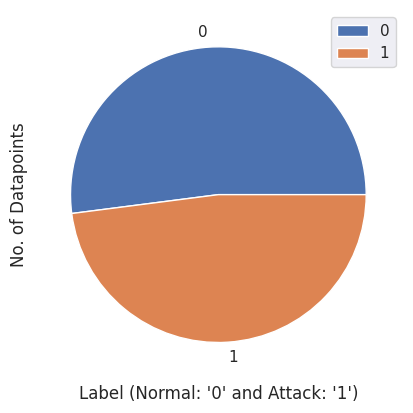

In [ ]:
## Checking for normal and anomalous data distribution
## (Normal: '0' and Attack: '1')
sns.set(style="darkgrid")

data['Label'].value_counts().plot.pie()

plt.xlabel("Label (Normal: '0' and Attack: '1')")
plt.ylabel("No. of Datapoints")
plt.legend()
plt.show()

Normal and attack data is somewhat balanced in this dataset.

# Feature Engineering

In [ ]:
## Getting the statistics for the dataFrame
data.describe()

Label
count  147907.000000
mean        0.479626
std         0.499586
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000

In [ ]:
## function for checking unique data in columns
def uniq(data, fea):
  uniq = len(np.unique(data[fea]))
  # Printing the results
  print("Unique {0} feature data values are {1}".format(fea, uniq))

## Checking no. of unique values in each columns of the dataset
for col in data.columns:
  uniq(data, col)

Unique duration feature data values are 3424
Unique protocol_type feature data values are 3
Unique service feature data values are 70
Unique flag feature data values are 11
Unique src_bytes feature data values are 3601
Unique dst_bytes feature data values are 10401
Unique land feature data values are 2
Unique wrong_fragment feature data values are 3
Unique urgent feature data values are 4
Unique hot feature data values are 29
Unique num_failed_logins feature data values are 6
Unique logged_in feature data values are 2
Unique num_compromised feature data values are 96
Unique root_shell feature data values are 2
Unique su_attempted feature data values are 3
Unique num_root feature data values are 91
Unique num_file_creations feature data values are 36
Unique num_shells feature data values are 4
Unique num_access_files feature data values are 10
Unique num_outbound_cmds feature data values are 1
Unique is_host_login feature data values are 2
Unique is_guest_login feature data values are 2

Since, we are more interested in classifying anomaly and don not care about which attack is more. we are just encoding data into four common attacks as mentioned below:

In [ ]:
## Converting the attacks subcategories that fall under these categories.
## Used methods from this reference
ddosAttacks = ['apache2','back','land','neptune','mailbomb','pod','processtable',
               'smurf','teardrop','udpstorm','worm']

probeAttacks = ['ipsweep','mscan','nmap','portsweep','saint','satan']

U2R = ['buffer_overflow','loadmdoule','perl','ps','rootkit',
                    'sqlattack','xterm']
R2L = ['ftp_write','guess_passwd','http_tunnel','imap','multihop',
                 'named','phf','sendmail','snmpgetattack','snmpguess','spy',
                 'warezclient','warezmaster','xclock','xsnoop']

attackCat = ['Normal','DdoS','Probe','U2R','R2L']

## helper function to pass to data frame mapping
def help_map(attack):
  if attack in ddosAttacks:
    atype = 1
  elif attack in probeAttacks:
    atype = 2
  elif attack in U2R:
    atype = 3
  elif attack in R2L:
    atype = 4
  else:
    atype = 0

  return atype

# map the data and join to the data set
mask = data.attack.apply(help_map)
data['attack_type'] = mask

In [ ]:
## making sure if changes are applied
data.head()

duration protocol_type   service flag src_bytes dst_bytes land  \
0        0           tcp  ftp_data   SF       491         0    0   
1        0           udp     other   SF       146         0    0   
2        0           tcp   private   S0         0         0    0   
3        0           tcp      http   SF       232      8153    0   
4        0           tcp      http   SF       199       420    0   

  wrong_fragment urgent hot  ... dst_host_same_src_port_rate  \
0              0      0   0  ...                        0.17   
1              0      0   0  ...                        0.88   
2              0      0   0  ...                         0.0   
3              0      0   0  ...                        0.03   
4              0      0   0  ...                         0.0   

  dst_host_srv_diff_host_rate dst_host_serror_rate dst_host_srv_serror_rate  \
0                         0.0                  0.0                      0.0   
1                         0.0                  0.0                      0.0   
2                         0.0                  1.0                      1.0   
3                        0.04                 0.03                     0.01   
4                         0.0                  0.0                      0.0   

  dst_host_rerror_rate dst_host_srv_rerror_rate   attack level Label  \
0                 0.05                      0.0   normal    20     0   
1                  0.0                      0.0   normal    15     0   
2                  0.0                      0.0  neptune    19     1   
3                  0.0                     0.01   normal    21     0   
4                  0.0                      0.0   normal    21     0   

  attack_type  
0           0  
1           0  
2           1  
3           0  
4           0  

[5 rows x 45 columns]

In [ ]:
## Checking the dimensions of the dataset
data.shape

(147907, 45)

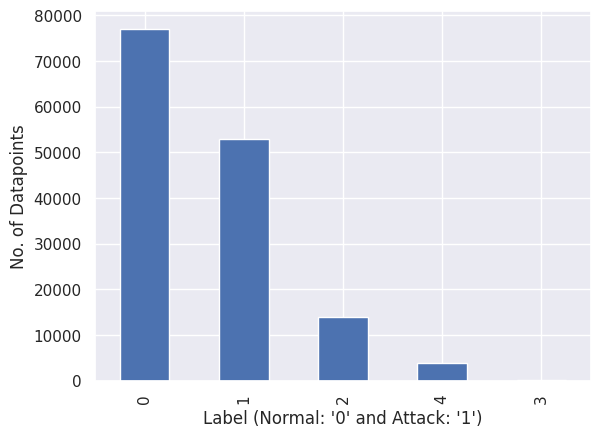

In [ ]:
## Making barplot to check the counts of different attacks
data['attack_type'].value_counts().plot.bar()

plt.xlabel("Label (Normal: '0' and Attack: '1')")
plt.ylabel("No. of Datapoints")
plt.show()

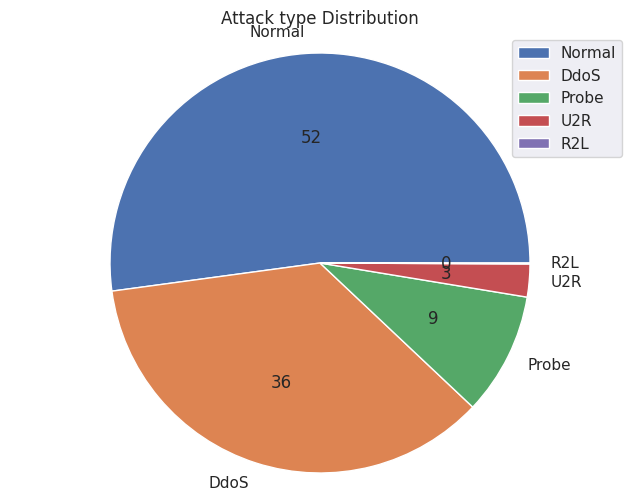

In [ ]:
## Creating a pie chart for more comprehensive view
## Used chatgpt's help
catCounts = data['attack_type'].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 6))
plt.pie(catCounts, labels = attackCat, autopct='%1.0f')
plt.title("Attack type Distribution")
plt.axis('equal')
plt.legend(labels= attackCat)
# Display the chart
plt.show()

In [ ]:
## Getting the no. of attacks in each category
for i in range(5):
  print(" {} cases are :{}".format( attackCat[i],catCounts[i]))

 Normal cases are :77120
 DdoS cases are :52987
 Probe cases are :13954
 U2R cases are :108
 R2L cases are :3738


## 2.1 Feature Encoding



In [ ]:
## Features to encode into one-hot encoding
catCols = ['protocol_type', 'service', 'flag']

data[catCols] = data[catCols].astype('object')
encoded_data = pd.get_dummies(data[catCols])

We will do min-max scaling on our numerical continous features

In [ ]:
## getting the columns names that are not in Category columns
colNames = data.columns.tolist()
colNames = [col for col in data.columns if col not in catCols]
print(colNames)

['duration', 'src_bytes', 'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot', 'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell', 'su_attempted', 'num_root', 'num_file_creations', 'num_shells', 'num_access_files', 'num_outbound_cmds', 'is_host_login', 'is_guest_login', 'count', 'srv_count', 'serror_rate', 'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count', 'dst_host_same_srv_rate', 'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate', 'dst_host_serror_rate', 'dst_host_srv_serror_rate', 'dst_host_rerror_rate', 'dst_host_srv_rerror_rate', 'attack', 'level', 'Label', 'attack_type']


In [ ]:
## Removing the features which tells us about the attacks
rm = ['attack', 'attack_type', 'level']
## Getting the numerical columns to scale
numCols = np.delete(colNames, np.where(np.isin(colNames, rm)))
print(numCols)

['duration' 'src_bytes' 'dst_bytes' 'land' 'wrong_fragment' 'urgent' 'hot'
 'num_failed_logins' 'logged_in' 'num_compromised' 'root_shell'
 'su_attempted' 'num_root' 'num_file_creations' 'num_shells'
 'num_access_files' 'num_outbound_cmds' 'is_host_login' 'is_guest_login'
 'count' 'srv_count' 'serror_rate' 'srv_serror_rate' 'rerror_rate'
 'srv_rerror_rate' 'same_srv_rate' 'diff_srv_rate' 'srv_diff_host_rate'
 'dst_host_count' 'dst_host_srv_count' 'dst_host_same_srv_rate'
 'dst_host_diff_srv_rate' 'dst_host_same_src_port_rate'
 'dst_host_srv_diff_host_rate' 'dst_host_serror_rate'
 'dst_host_srv_serror_rate' 'dst_host_rerror_rate'
 'dst_host_srv_rerror_rate' 'Label']


In [ ]:
## Joiining the numerical columns with the one-hot encoded data
data_mod = encoded_data.join(data[numCols])
feaNames = data_mod.columns
data_mod.shape

(147907, 123)

In [ ]:
## Getting an overview of the modified data
data_mod.head()

protocol_type_icmp  protocol_type_tcp  protocol_type_udp  service_IRC  \
0                   0                  1                  0            0   
1                   0                  0                  1            0   
2                   0                  1                  0            0   
3                   0                  1                  0            0   
4                   0                  1                  0            0   

   service_X11  service_Z39_50  service_aol  service_auth  service_bgp  \
0            0               0            0             0            0   
1            0               0            0             0            0   
2            0               0            0             0            0   
3            0               0            0             0            0   
4            0               0            0             0            0   

   service_courier  ...  dst_host_srv_count  dst_host_same_srv_rate  \
0                0  ...                  25                    0.17   
1                0  ...                   1                     0.0   
2                0  ...                  26                     0.1   
3                0  ...                 255                     1.0   
4                0  ...                 255                     1.0   

   dst_host_diff_srv_rate  dst_host_same_src_port_rate  \
0                    0.03                         0.17   
1                     0.6                         0.88   
2                    0.05                          0.0   
3                     0.0                         0.03   
4                     0.0                          0.0   

   dst_host_srv_diff_host_rate  dst_host_serror_rate  \
0                          0.0                   0.0   
1                          0.0                   0.0   
2                          0.0                   1.0   
3                         0.04                  0.03   
4                          0.0                   0.0   

   dst_host_srv_serror_rate  dst_host_rerror_rate  dst_host_srv_rerror_rate  \
0                       0.0                  0.05                       0.0   
1                       0.0                   0.0                       0.0   
2                       1.0                   0.0                       0.0   
3                      0.01                   0.0                      0.01   
4                       0.0                   0.0                       0.0   

   Label  
0      0  
1      0  
2      1  
3      0  
4      0  

[5 rows x 123 columns]

In [ ]:
## Dividing data into normal and abnormal attacks
normalData = np.array(data_mod[data_mod['Label']==0])
abnormalData = np.array(data_mod[data_mod['Label']==1])
## Getting the no. of rows to takes
nRows = int(np.round(normalData.shape[0]*.70))
print("No. of rows to get for training data: ",nRows)

No. of rows to get for training data:  53877


In [ ]:
## Shape of anomalous data
abnormalData.shape

(70940, 123)

In [ ]:
# getting the required data at random using numpy
indices = np.random.choice(normalData.shape[0], size = nRows,
                           replace = False)
X_train = normalData[indices,:]


## Print the shape of the modified data
print(X_train.shape)

(53877, 123)


In [ ]:
## Getting the remaining normal data
mask = np.logical_not(np.isin(np.arange(normalData.shape[0]), indices))
normalData = normalData[mask,:]

## Printing the dimension after modification
normalData.shape

(23090, 123)

In [ ]:
## Getting some normal cases for validation
nRows = int(np.round(normalData.shape[0]*.30))
print("No. of rows to get for validation data: ",nRows)
# getting the required data at random using numpy
indices = np.random.choice(normalData.shape[0], size = nRows,
                           replace = False)
X_val = normalData[indices,:]


## Print the shape of the modified data
print(X_val.shape)

No. of rows to get for validation data:  6927
(6927, 123)


In [ ]:
## Getting the remaining normal data
mask = np.logical_not(np.isin(np.arange(normalData.shape[0]), indices))
normalData = normalData[mask,:]

## Printing the dimension after modification
normalData.shape

(16163, 123)

In [ ]:
## Combining remaining normal with abnormal cases to create the test data
remainingData = np.concatenate((normalData, abnormalData), axis=0)

## Shuffling the combined data
np.random.shuffle(remainingData)

## Storing the data for testing
X_test = remainingData

## Dimensions of the test data
X_test.shape

(87103, 123)

In [ ]:
## Converting back to pandas dataFrame for preprocessing
feaNames = data_mod.columns
X_train = pd.DataFrame(X_train, columns = feaNames)
X_val = pd.DataFrame(X_val, columns = feaNames)
X_test = pd.DataFrame(X_test, columns = feaNames)

## Storing and dropping the Lables
y_train = X_train["Label"].tolist()
X_train = X_train.drop("Label", axis=1)
feaNames = feaNames.drop('Label')

y_val = X_val["Label"].tolist()
X_val = X_val.drop("Label", axis=1)

y_test = X_test["Label"].tolist()
X_test = X_test.drop("Label", axis=1)

## 2.2 Feature scaling


In [ ]:
################### scaling features in the dataset ####################
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
## Doing scaling on training data
X_train = scaler.fit_transform(X_train)

## Doing scaling on validation and test data
X_val = scaler.transform(X_val)

X_test = scaler.transform(X_test)

In [ ]:
print("Shape of the training data:", X_train.shape)
print("Shape of the validation data:", X_val.shape)
print("Shape of the test data:", X_test.shape)

Shape of the training data: (53877, 122)
Shape of the validation data: (6927, 122)
Shape of the test data: (87103, 122)


# Autoencoder

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow import keras
from tensorflow.keras import Model
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import KFold
# Set the seed for TensorFlow to make results reproducible
tf.random.set_seed(42)


## Converting to tensor
X_train = tf.convert_to_tensor(X_train, dtype = tf.float32)
X_val = tf.convert_to_tensor(X_val, dtype = tf.float32)
X_test = tf.convert_to_tensor(X_test, dtype = tf.float32)


## K-fold cross validation

In [ ]:
## Built an autoencoder using this
## tutorial https://www.tensorflow.org/tutorials/generative/autoencoder
X = np.concatenate((X_train, X_val), axis=0) ## Concatenate training and validation data
kf = KFold(n_splits=5)  ## Defining the number of folds for cross-validation

fold_scores = []  ##To store the scores for each fold

# Perform cross-validation
for train_index, val_index in kf.split(X):
    # Split the data into training and validation sets for the current fold
    X_train_fold, X_val_fold = X[train_index], X[val_index]
    ## Our AE model
    class autoEncoder(Model):
       def __init__(self):
        super(autoEncoder, self).__init__()
        self.encoder = tf.keras.Sequential([
         layers.Dense(36, activation="LeakyReLU"),
         layers.Dense(8, activation="LeakyReLU")])

        self.decoder = tf.keras.Sequential([
         layers.Dense(36, activation="LeakyReLU"),
         layers.Dense(122, activation="sigmoid")])


       def call(self, input):
        encoded = self.encoder(input)
        decoded = self.decoder(encoded)
        return decoded
    # Initialize a new instance of the autoEncoder model for each fold
    autoEncoder = autoEncoder()
    # Compile the model
    autoEncoder.compile(optimizer='adam', loss='mae')

    ## Fit the model to the current fold's training data
    fittedModel = autoEncoder.fit(X_train_fold, X_train_fold, epochs=11,
      batch_size=128, validation_data=(X_val_fold, X_val_fold), shuffle=True)

  ## Evaluate the model on the current fold's validation data and store the score
    fold_score = autoEncoder.evaluate(X_val_fold, X_val_fold)
    fold_scores.append(fold_score)

## Calculate the average score across all folds
average_score = np.mean(fold_scores)

## Printing the average score
print("Average score:", average_score)

Epoch 1/11
381/381 [==============================] - 3s 5ms/step - loss: 0.0796 - val_loss: 0.0254
Epoch 2/11
381/381 [==============================] - 2s 5ms/step - loss: 0.0242 - val_loss: 0.0223
Epoch 3/11
381/381 [==============================] - 2s 6ms/step - loss: 0.0193 - val_loss: 0.0146
Epoch 4/11
381/381 [==============================] - 2s 5ms/step - loss: 0.0132 - val_loss: 0.0128
Epoch 5/11
381/381 [==============================] - 2s 4ms/step - loss: 0.0125 - val_loss: 0.0126
Epoch 6/11
381/381 [==============================] - 2s 4ms/step - loss: 0.0124 - val_loss: 0.0125
Epoch 7/11
381/381 [==============================] - 3s 7ms/step - loss: 0.0123 - val_loss: 0.0124
Epoch 8/11
381/381 [==============================] - 2s 4ms/step - loss: 0.0122 - val_loss: 0.0123
Epoch 9/11
381/381 [==============================] - 2s 4ms/step - loss: 0.0107 - val_loss: 0.0107
Epoch 10/11
381/381 [==============================] - 2s 4ms/step - loss: 0.0104 - val_loss: 0.0104

##3.1 Model architecture

In [ ]:
## Now training our model on actual training
## Built an autoencoder using this
## tutorial https://www.tensorflow.org/tutorials/generative/autoencoder
class autoEncoder(Model):
       def __init__(self):
        super(autoEncoder, self).__init__()
        self.encoder = tf.keras.Sequential([
         layers.Dense(36, activation="LeakyReLU"),
         layers.Dense(8, activation="LeakyReLU")])

        self.decoder = tf.keras.Sequential([
         layers.Dense(36, activation="LeakyReLU"),
         layers.Dense(122, activation="sigmoid")])


       def call(self, input):
        encoded = self.encoder(input)
        decoded = self.decoder(encoded)
        return decoded
## Craeting an instance of the class
autoencoder = autoEncoder()
## Fitting the model with 22 max epochs and batch_size of 64 and simuntaneously
## checking performance on validation dataset
early_stopping = EarlyStopping(monitor='val_loss', patience=5,
                               restore_best_weights=True)

## Using the adam optimizer and mean average error loss function
autoencoder.compile(optimizer = 'adam', loss = 'mae')
fittedModel = autoencoder.fit(X_train, X_train, epochs = 22, batch_size = 64,
              validation_data=(X_val, X_val), shuffle=True,
                              callbacks=[early_stopping])

Epoch 1/22
842/842 [==============================] - 5s 4ms/step - loss: 0.0502 - val_loss: 0.0209
Epoch 2/22
842/842 [==============================] - 3s 4ms/step - loss: 0.0167 - val_loss: 0.0158
Epoch 3/22
842/842 [==============================] - 3s 3ms/step - loss: 0.0154 - val_loss: 0.0143
Epoch 4/22
842/842 [==============================] - 3s 4ms/step - loss: 0.0141 - val_loss: 0.0143
Epoch 5/22
842/842 [==============================] - 3s 3ms/step - loss: 0.0138 - val_loss: 0.0137
Epoch 6/22
842/842 [==============================] - 4s 5ms/step - loss: 0.0134 - val_loss: 0.0135
Epoch 7/22
842/842 [==============================] - 3s 4ms/step - loss: 0.0132 - val_loss: 0.0134
Epoch 8/22
842/842 [==============================] - 4s 4ms/step - loss: 0.0132 - val_loss: 0.0134
Epoch 9/22
842/842 [==============================] - 3s 3ms/step - loss: 0.0132 - val_loss: 0.0132
Epoch 10/22
842/842 [==============================] - 3s 4ms/step - loss: 0.0127 - val_loss: 0.0125

## 3.3 Train Loss

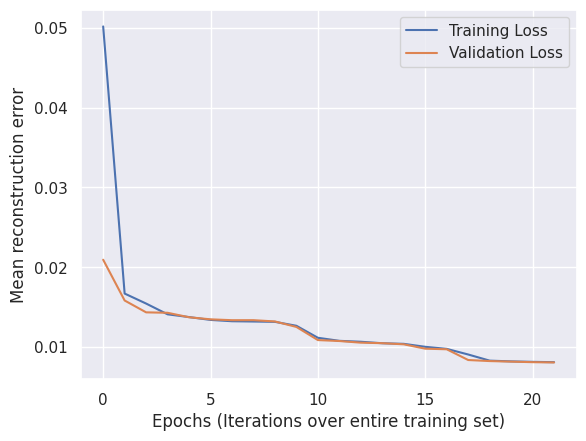

In [ ]:
## Plotting the loss for our model
plt.plot(fittedModel.history["loss"], label="Training Loss")
plt.plot(fittedModel.history["val_loss"], label="Validation Loss")
plt.xlabel("Epochs (Iterations over entire training set)")
plt.ylabel("Mean reconstruction error")
plt.legend()

1684/1684 [==============================] - 3s 2ms/step


Text(0, 0.5, 'Datapoints')

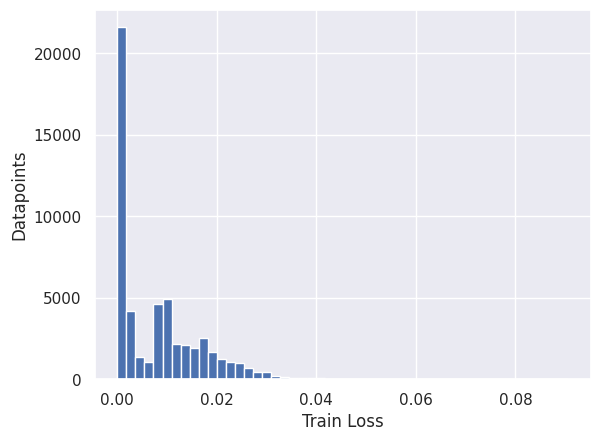

In [ ]:
## Deciding a threshold
reConstruction = autoencoder.predict(X_train)
trainLoss = tf.keras.losses.mae(reConstruction, X_train)

## Plotting the loss
plt.hist(trainLoss[None, :], bins = 50)
plt.xlabel("Train Loss")
plt.ylabel("Datapoints")

In [ ]:
## Getting test Statistics for reConstruction training Loss
mean = np.mean(trainLoss.numpy())
maxVal = np.max(trainLoss.numpy())
minVal = np.min(trainLoss.numpy())
std = np.std(trainLoss.numpy())
confidenceInterval = np.percentile(trainLoss.numpy(), [2.5, 97.5])

## Printing train Loss statistics
print("Mean:", mean)
print("Max:", maxVal)
print("Min:", minVal)
print("Standard Deviation:", std)
print("Spread range is:", confidenceInterval)

Mean: 0.0080752745
Max: 0.0906108
Min: 4.6196306e-05
Standard Deviation: 0.00883237
Spread range is: [0.00015453 0.02869336]


In [ ]:
## Used this as refrence (https://www.tensorflow.org/tutorials/generative/)
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, roc_auc_score,
                                  precision_recall_curve


## Used this as refrence (https://www.tensorflow.org/tutorials/generative/)
def predictModel(model, XX, threshold):
  reConstruction = model(XX)
  loss = tf.keras.losses.mae(reConstruction, XX)
  return tf.math.greater(loss, threshold)

def Stats(predictions, labels):
  print("Accuracy = {}".format(accuracy_score(labels, predictions)))
  print("F1-score = {}".format(f1_score(labels, predictions, zero_division=1)))
  print("Precision = {}".format(precision_score(labels, predictions,
                                                zero_division=1)))
  print("Recall = {}".format(recall_score(labels, predictions, zero_division=1)))
  print("AUC-ROC = {}".format(roc_auc_score(labels, predictions)))

In [ ]:
# Getting rough idea of threshold
#threshold = np.mean(trainLoss) + 3 * np.std(trainLoss)
threshold_train = mean + std
print("Threshold is:", threshold_train)

Threshold is: 0.016907644


In [ ]:
## Stats based on this threshold
preds = predictModel(autoencoder, X_test, threshold_train)
Stats(preds, y_test)
## Getting the classification report
print(classification_report(y_test, preds))

Accuracy = 0.9207030756690355
F1-score = 0.9508451055047504
Precision = 0.9601724757455983
Recall = 0.9416972089089372
AUC-ROC = 0.8851281317699422
              precision    recall  f1-score   support

           0       0.76      0.83      0.79     16163
           1       0.96      0.94      0.95     70940

    accuracy                           0.92     87103
   macro avg       0.86      0.89      0.87     87103
weighted avg       0.92      0.92      0.92     87103



## 3.4 Validation Loss

217/217 [==============================] - 0s 2ms/step


Text(0, 0.5, 'Datapoints')

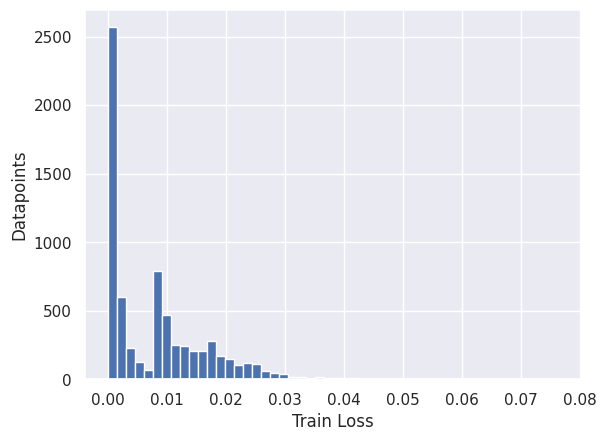

In [ ]:
## Deciding a threshold
reConstruction = autoencoder.predict(X_val)
ValLoss = tf.keras.losses.mae(reConstruction, X_val)

## Plotting the loss
plt.hist(ValLoss[None, :], bins = 50)
plt.xlabel("Train Loss")
plt.ylabel("Datapoints")

In [ ]:
## Getting test Statistics for reConstruction training Loss
mean = np.mean(ValLoss)
maxVal = np.max(ValLoss)
minVal = np.min(ValLoss)
std = np.std(ValLoss)
perInterval = np.percentile(ValLoss.numpy(), [2.5, 97.5])

## Printing train Loss statistics
print("Mean:", mean)
print("Max:", maxVal)
print("Min:", minVal)
print("Standard Deviation:", std)
print("Spread range is:", perInterval)

Mean: 0.008437352
Max: 0.07602084
Min: 5.1083927e-05
Standard Deviation: 0.012941168
Spread range is: [0.00017652 0.05788134]


In [ ]:
# Getting rough idea of threshold
#threshold = np.mean(trainLoss) + 3 * np.std(trainLoss)
threshold_val = mean
print("Threshold is:", threshold_val)

Threshold is: 0.008437352


In [ ]:
## Stats based on this threshold
preds = predictModel(autoencoder, X_test, threshold_val)
Stats(preds, y_test)
## Getting the classification report
print(classification_report(y_test, preds))

Accuracy = 0.9044809019207145
F1-score = 0.9431686225221656
Precision = 0.9149328103050703
Recall = 0.9732027065125458
AUC-ROC = 0.7880305433818684
              precision    recall  f1-score   support

           0       0.84      0.60      0.70     16163
           1       0.91      0.97      0.94     70940

    accuracy                           0.90     87103
   macro avg       0.88      0.79      0.82     87103
weighted avg       0.90      0.90      0.90     87103



In [ ]:
## Doing a grid serch to select the threshold based on validation set
def find_best_threshold(model, X_val, y_val):
  max_error = -9999999
  for i in range(0,30):


    reConstruction = autoencoder.predict(X_val)
    loss = tf.keras.losses.mae(reConstruction, X_val).numpy()
    # Calculate maximum construction error
    meanconstruction_error = np.max(np.mean(loss)+ np.std(loss))

    # Update best threshold and maximum construction error if necessary
    if meanconstruction_error > max_error:
        max_error = meanconstruction_error


  return max_error
## Getting the best threshold value and printing it
bestThreshold = find_best_threshold(autoEncoder, X_val, y_val)
print("Best Threshold:", bestThreshold)

217/217 [==============================] - 0s 2ms/step
Best Threshold: 0.016832367


In [ ]:
## Metrics for the best threshold
predsTest = predictModel(autoencoder, X_test,  bestThreshold)
Stats(predsTest, y_test)

Accuracy = 0.9205538270782866
F1-score = 0.9507718574375755
Precision = 0.9597156398104265
Recall = 0.9419932337186354
AUC-ROC = 0.8842243592338768


Confusion Matrix:
[[13392  2771]
 [ 4136 66804]]
AUC-ROC Score: 0.8851281317699422


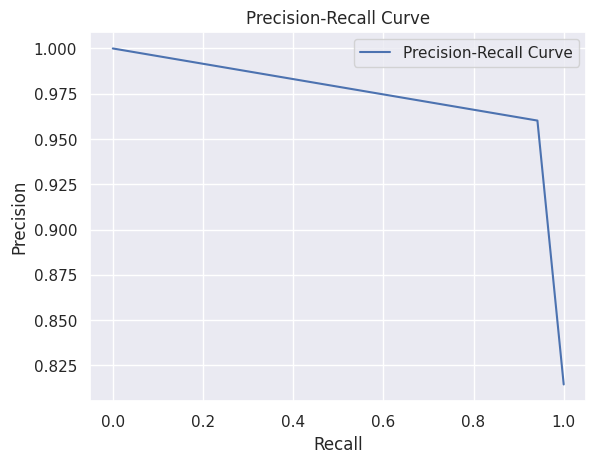

In [ ]:
# Calculate the confusion matrix
cm = confusion_matrix(y_test, preds)
print("Confusion Matrix:")
print(cm)

# Calculate the AUC-ROC score
auc_roc = roc_auc_score(y_test, preds)
print("AUC-ROC Score:", auc_roc)

# Calculate precision and recall values for plotting the precision-recall curve
precision, recall, thresholds = precision_recall_curve(y_test, preds)

# Plot the precision-recall curve
plt.plot(recall, precision, label='Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()

## 3.5 Visualizing the results

In [ ]:
## Taken refrence code from following book:
## Beginning Anomaly Detection Using Python-Based Deep Learning:
## With Keras and PyTorch by by Sridhar Alla (Author), Suman Kalyan Adari(Author)
def plot_anomaly(y, error, best_threshold):
    Df = pd.DataFrame({'error': error, 'true': y}).groupby('true')
    figure, axes = plt.subplots(figsize=(10, 6))

    for name, group in Df:
        axes.plot(group.index, group.error, marker='x' if name == 1 else 'o',
          linestyle='', color='crimson' if name == 1 else 'limegreen',
                  label="Anomaly" if name == 1 else "Normal")

    axes.hlines(best_threshold, axes.get_xlim()[0], axes.get_xlim()[1],
                color='darkblue', zorder=100, label='Threshold')
    axes.legend()
    axes.set_ylim(-0.001, .050)
    plt.title("Anomaly detection")
    plt.ylabel("Reconstruction Error")
    plt.xlabel("Observations")
    plt.show()
## Created function to create confusion matrix takes matrix as input returns the
## plot using Chatgpt
def plot_confusion_matrix(confusion_matrix, labels):
    figure, axes = plt.subplots(figsize=(8, 6))
    heatmap = sns.heatmap(confusion_matrix, annot=True, fmt="d", cmap="Blues",
                          cbar=False)
    heatmap.set_xticklabels(labels, rotation=45, ha='right')
    heatmap.set_yticklabels(labels, rotation=0)
    axes.set_xlabel('Predicted')
    axes.set_ylabel('True')
    plt.title('Confusion Matrix')
    plt.show()

In [ ]:
## Getting the test reconstruction loss
reConstructionTest = autoencoder.predict(X_test)
Loss_test = tf.keras.losses.mae(reConstructionTest, X_test)

2722/2722 [==============================] - 10s 4ms/step


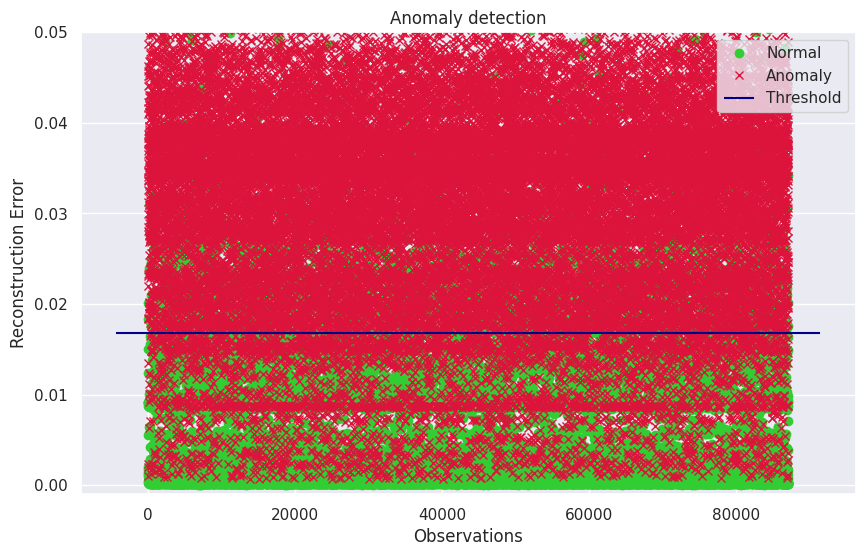

In [ ]:
plot_anomaly(y_test, Loss_test, bestThreshold)

## 3.6 Confusion matrix

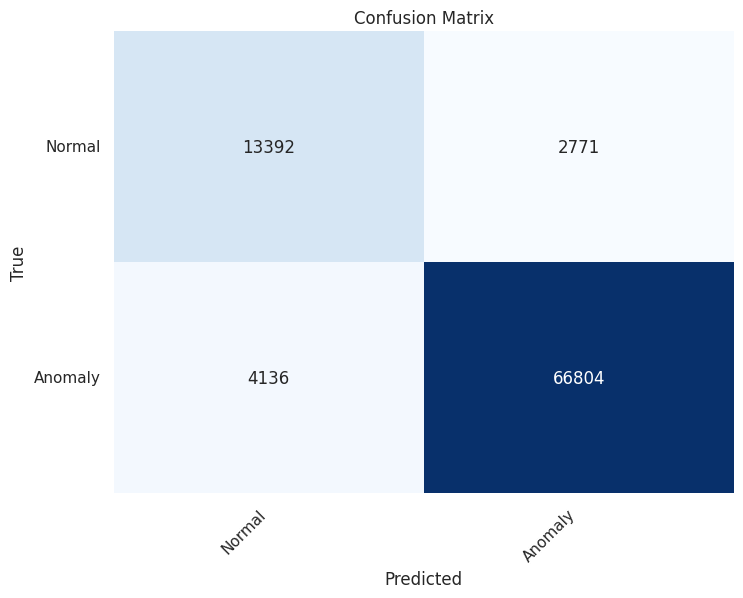

In [ ]:
## plotting the confusion matrix
plot_confusion_matrix(np.array(cm), np.array(['Normal', 'Anomaly']))

# Variational autoencoders

## 4.1 Fitting the model

In [ ]:
## Taken plotting code reference from following book:
## Beginning Anomaly Detection Using Python-Based Deep Learning:
## With Keras and PyTorch by by Sridhar Alla (Author), Suman Kalyan Adari(Author)
## Loading the required libraries
from re import VERBOSE
from keras import optimizers
from keras.layers import Input, Dropout, Embedding, LSTM, Lambda
from keras.losses import mse
from keras.optimizers import Adam
from keras import backend as B
from keras.models import Sequential, Model


## Creating an class for variational autoencoder(VAE)
class VariationalAutoencoder():
    def __init__(self, input_dim, encoder_dim, latent_dim, decoder_dim):
        self.input_dim = input_dim
        self.encoder_dim = encoder_dim
        self.latent_dim = latent_dim
        self.decoder_dim = decoder_dim
        self.vae = None
    ## function for Reparameterisation trick to do sampling
    def sample(self, args):
      ## Getting the arguments
        zMean, zLogVar = args
        ## Getting the batch size
        batch = B.shape(zMean)[0]
        dim = B.int_shape(zMean)[1]

        ## Getting the epsilon from standard normal
        epsilon = B.random_normal(shape=(batch, dim))
        return zMean + B.exp(0.5 * zLogVar) * epsilon
    ## function to build the VAE
    def build(self):
      ## Getting the input shapes
        inputs = Input(shape=(self.input_dim,), name='encoderInput')
        Encoder = Dense(self.encoder_dim, activation='LeakyReLU')(inputs)
        zMean = Dense(self.latent_dim, name='zMean')(Encoder)
        zLogVar = Dense(self.latent_dim, name='zLogVar')(Encoder)

        z = Lambda(self.sample, output_shape=(self.latent_dim,),
                   name='z')([zMean, zLogVar])

        ## Encoder
        encoder = Model(inputs, [zMean, zLogVar, z], name='encoder')
        encoder.summary()


        ## Latent-space representation
        latent_inputs = Input(shape=(self.latent_dim,), name='zSampling')
        Code = Dense(self.decoder_dim, activation='LeakyReLU')(latent_inputs)
        outputs = Dense(self.input_dim, activation='sigmoid')(Code)

        ## Decoder
        decoder = Model(latent_inputs, outputs, name='decoder')
        decoder.summary()

        outputs = decoder(encoder(inputs)[2])
        vae = Model(inputs, outputs, name='vae')


        ## Reconstruction Loss(=MSE - KL divergence)
        reconstructionLoss = mse(inputs, outputs)
        reconstructionLoss *= self.input_dim

        ## Calculating the KL-divergence loss
        kLloss = 1 + zLogVar - B.square(zMean) - B.exp(zLogVar)
        kLloss = B.sum(kLloss, axis=1)
        kLloss *= -0.5

        vae_loss = B.mean(reconstructionLoss + kLloss)
        vae.add_loss(vae_loss)

        ## Compiling the model
        vae.compile(optimizer='adam', metrics=['accuracy'])
        vae.summary()
        self.vae = vae

    def fit(self, X_train, X_val, batch_size, epochs):
        self.vaeFit = self.vae.fit(X_train, X_train, batch_size=batch_size,
              epochs=epochs, verbose=1, shuffle=True,
                                   validation_data=(X_val, X_val))
    def plotLoss(self):
      plt.plot(self.vaeFit.history["loss"], label="Training Loss")
      plt.plot(self.vaeFit.history["val_loss"], label="Validation Loss")
      plt.xlabel("Epochs (Iterations over entire training set)")
      plt.ylabel("Mean squared reconstruction error")
      plt.legend()
      plt.show()
    def predict(self, XX):
      return self.vae.predict(XX)
    def evaluate(self, XX):
      return self.vae.evaluate(XX, XX, verbose= True)

In [ ]:
## Initializing the model parameters
input_dim = X_train.shape[1]
inputShape = (input_dim,)

## Encoder dimension
encoderDim = 36
## Latent space dimension
latentDim = 8
## Decoder dimesions
decoderDim = 36

## Creating an instance of VariationalAutoencoder(VAE) Class
vae = VariationalAutoencoder(input_dim, encoderDim, latentDim, decoderDim)
## Calling the build inside the class to build an VAE
vae.build()

## Fitting the mode with 22 training iterations and batch_size = 64
vae.fit(X_train, X_val, batch_size=64, epochs = 22)

Model: "encoder"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 encoderInput (InputLayer)      [(None, 122)]        0           []                               
                                                                                                  
 dense (Dense)                  (None, 36)           4428        ['encoderInput[0][0]']           
                                                                                                  
 zMean (Dense)                  (None, 8)            296         ['dense[0][0]']                  
                                                                                                  
 zLogVar (Dense)                (None, 8)            296         ['dense[0][0]']                  
                                                                                            

## 4.2 Train Loss

1684/1684 [==============================] - 2s 1ms/step


Text(0, 0.5, 'Datapoints')

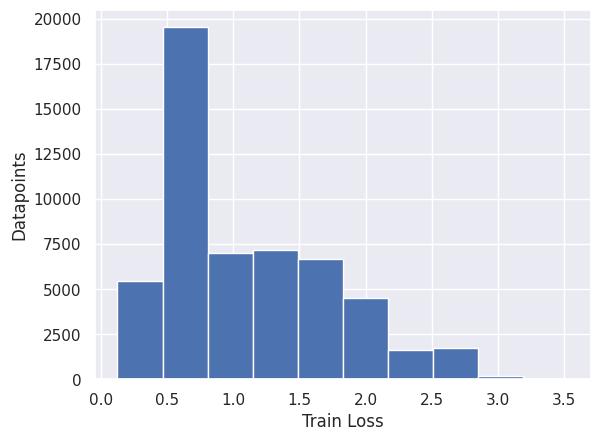

In [ ]:
## Deciding a threshold
reConstruction = vae.predict(X_train)
trainLoss = np.linalg.norm(X_train - reConstruction, axis=-1)

## Plotting the loss
plt.hist(trainLoss)
plt.xlabel("Train Loss")
plt.ylabel("Datapoints")

In [ ]:
## Getting test Statistics for reConstruction training Loss
mean = np.mean(trainLoss)
maxVal = np.max(trainLoss)
minVal = np.min(trainLoss)
std = np.std(trainLoss)
perInt = np.percentile(trainLoss, [2.5, 97.5])

## Printing train Loss statistics
print("Mean:", mean)
print("Max:", maxVal)
print("Min:", minVal)
print("Standard Deviation:", std)
print("Spread range interval is:", perInt)

Mean: 1.0963817
Max: 3.5328016
Min: 0.12392491
Standard Deviation: 0.62644243
Spread range interval is: [0.31388319 2.58282657]


In [ ]:
## Taken plotting code refrence from following book:
## Beginning Anomaly Detection Using Python-Based Deep Learning:
## With Keras and PyTorch by by Sridhar Alla (Author), Suman Kalyan Adari(Author)
## Thresholf from which we are trying to detect anomaly
threshold = mean
print('Threshold is:', threshold)
yy_pred = vae.predict(X_test)
yyDist = np.linalg.norm(X_test - yy_pred, axis =-1)
zz = zip(yyDist >= threshold, yyDist)
yLabel = []
testReconsError = []
for idx, (anomaly, yyDist) in enumerate(zz):
  if anomaly:
    yLabel.append(1)
  else:
    yLabel.append(0)
  testReconsError.append(yyDist)
Stats(yLabel, y_test)

Threshold is: 1.0963817
2722/2722 [==============================] - 6s 2ms/step
Accuracy = 0.9084187685843197
F1-score = 0.9460353540478559
Precision = 0.9094941401423016
Recall = 0.9856357485198759
AUC-ROC = 0.7775731795869193


## 4.3 Visualizing the anomaly detection using the VAE

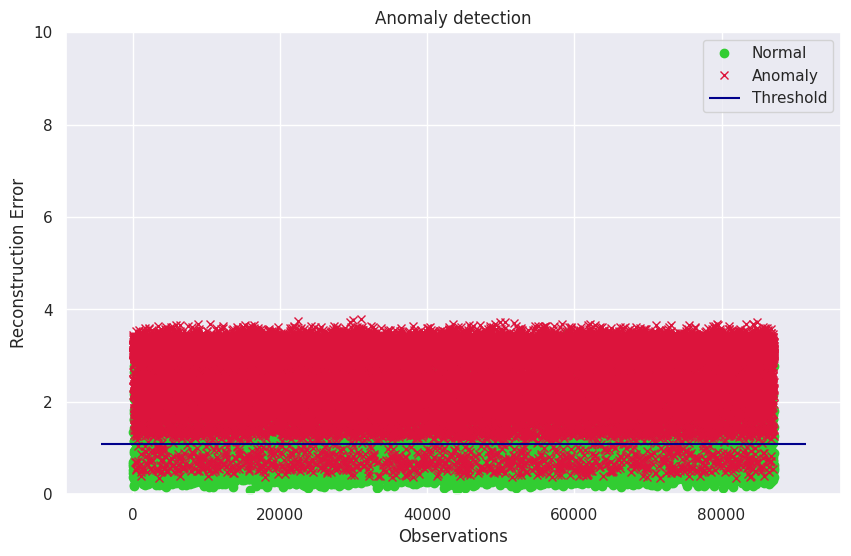

In [ ]:
## Code refrenced from
## ## Beginning Anomaly Detection Using Python-Based Deep Learning:
## With Keras and PyTorch by by Sridhar Alla (Author), Suman Kalyan Adari(Author)
def plot_anomaly(y, error, best_threshold):
    Df = pd.DataFrame({'error': error, 'true': y}).groupby('true')
    figure, axes = plt.subplots(figsize=(10, 6))

    for name, group in Df:
        axes.plot(group.index, group.error, marker='x' if name == 1 else 'o',
          linestyle='', color='crimson' if name == 1 else 'limegreen',
                  label="Anomaly" if name == 1 else "Normal")

    axes.hlines(best_threshold, axes.get_xlim()[0], axes.get_xlim()[1],
                color='darkblue', zorder=100, label='Threshold')
    axes.legend()
    axes.set_ylim(0, 10)
    plt.title("Anomaly detection")
    plt.ylabel("Reconstruction Error")
    plt.xlabel("Observations")
    plt.show()
## Plotting the plot
plot_anomaly(y_test, testReconsError, threshold)

217/217 [==============================] - 0s 1ms/step


Text(0, 0.5, 'Datapoints')

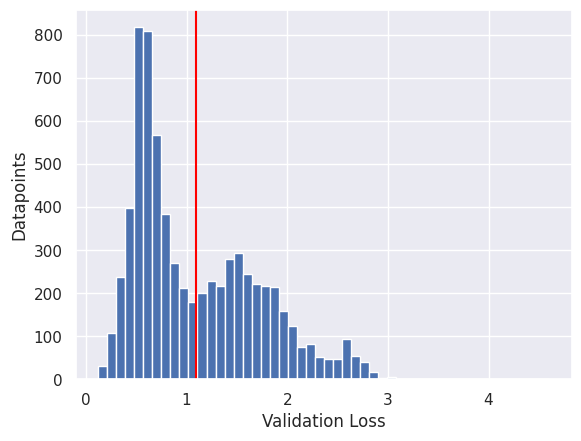

In [ ]:
## Getting reconstruction error for validationd data
reConstructionVal = vae.predict(X_val)
trainLossVal = np.linalg.norm(X_val - reConstructionVal, axis=-1)

## Plotting the loss
plt.hist(trainLossVal, bins=50)
plt.axvline(threshold, color='red')
plt.xlabel("Validation Loss")
plt.ylabel("Datapoints")

In [ ]:
from matplotlib.transforms import interval_contains
## Getting test Statistics for reConstruction validation Loss
mean = np.mean(trainLossVal)
maxVal = np.max(trainLossVal)
minVal = np.min(trainLossVal)
std = np.std(trainLossVal)
perint = np.percentile(trainLossVal, [2.5, 97.5])

## Printing train Loss statistics
print("Mean:", mean)
print("Max:", maxVal)
print("Min:", minVal)
print("Standard Deviation:", std)
print("Spread range interval is:", perint)

Mean: 1.0952572
Max: 4.602781
Min: 0.12265449
Standard Deviation: 0.6219999
Spread range interval is: [0.31916632 2.58155433]


In [ ]:
## taken from
## Beginning Anomaly Detection Using Python-Based Deep Learning:
## With Keras and PyTorch by by Sridhar Alla (Author), Suman Kalyan Adari(Author)
threshold = mean
print('Threshold is:', threshold)
## Getting the predictions
yy_pred = vae.predict(X_test)
## Calculating the mse
yyDist = np.linalg.norm(X_test - yy_pred, axis =-1)
## making the vector for as well as anomalies
zz = zip(yyDist >= threshold, yyDist)
yLabel = []
testReconsError = []
## checking the if the anomaly is present or not
for idx, (anomaly, yyDist) in enumerate(zz):
  if anomaly:
    yLabel.append(1)
  else:
    yLabel.append(0)
  testReconsError.append(yyDist)
## Getting the stats for predictions
Stats(yLabel, y_test)

Threshold is: 1.0952572
2722/2722 [==============================] - 4s 2ms/step
Accuracy = 0.9080399067770341
F1-score = 0.9458190722277088
Precision = 0.9091783921558428
Recall = 0.9855370735833099
AUC-ROC = 0.7767195359873489


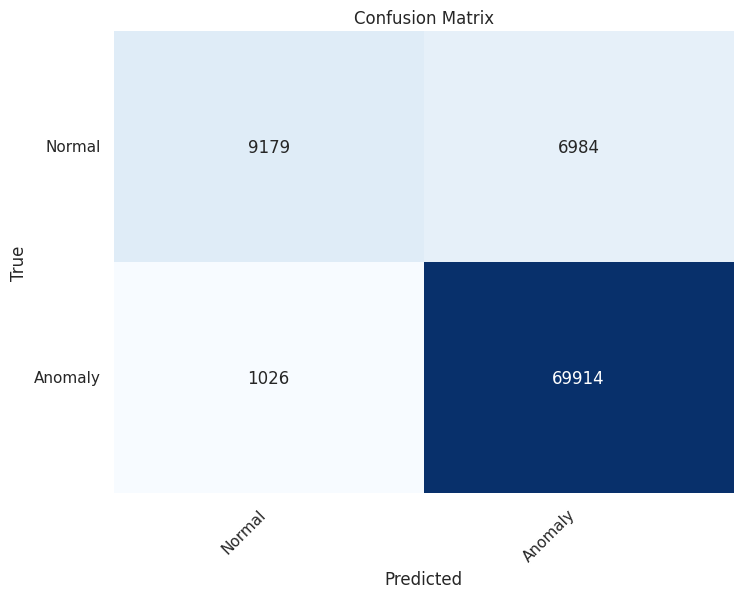

In [ ]:
## plotting the confusion matrix
cm = confusion_matrix(y_test, yLabel)

plot_confusion_matrix(np.array(cm), np.array(['Normal', 'Anomaly']))


In [ ]:
## Tuning the threshold based on the validation set
max_error = -float('inf')

for i in range(0,50):
    yy_pred = vae.predict(X_val)
    yyDist = np.linalg.norm(X_val - yy_pred, axis=-1)

    # Calculate maximum construction error
    meanconstruction_error = np.max(np.mean(yyDist))

    # Update best threshold and maximum construction error if necessary
    if meanconstruction_error > max_error:
        max_error = meanconstruction_error
print("Maximum Construction Error:", max_error)

217/217 [==============================] - 0s 2ms/step
Maximum Construction Error: 1.1029466


In [ ]:
## taken refrence from
## Beginning Anomaly Detection Using Python-Based Deep Learning:
## With Keras and PyTorch by by Sridhar Alla (Author), Suman Kalyan Adari(Author)
threshold = max_error
yy_pred = vae.predict(X_test)
yyDist = np.linalg.norm(X_test - yy_pred, axis =-1)
zz = zip(yyDist >= threshold, yyDist)
yLabel = []
testReconsError = []
for idx, (anomaly, yyDist) in enumerate(zz):
  if anomaly:
    yLabel.append(1)
  else:
    yLabel.append(0)
  testReconsError.append(yyDist)
Stats(yLabel, y_test)

2722/2722 [==============================] - 5s 2ms/step
Accuracy = 0.9091420502164105
F1-score = 0.94642567018684
Precision = 0.9104324042719458
Recall = 0.985382012968706
AUC-ROC = 0.779952034758807


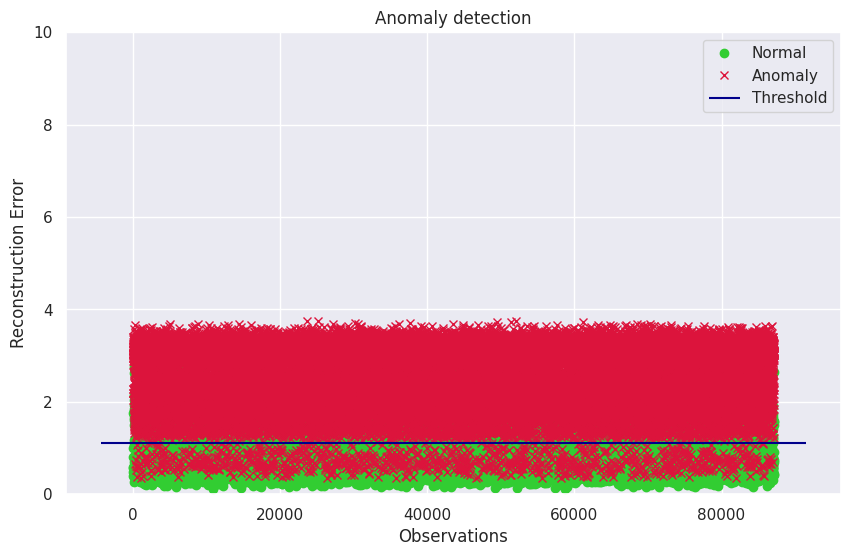

In [ ]:
## Plotting the plot with threshold
plot_anomaly(y_test, testReconsError, max_error)

## 4.4 Confusion matrix of predictions

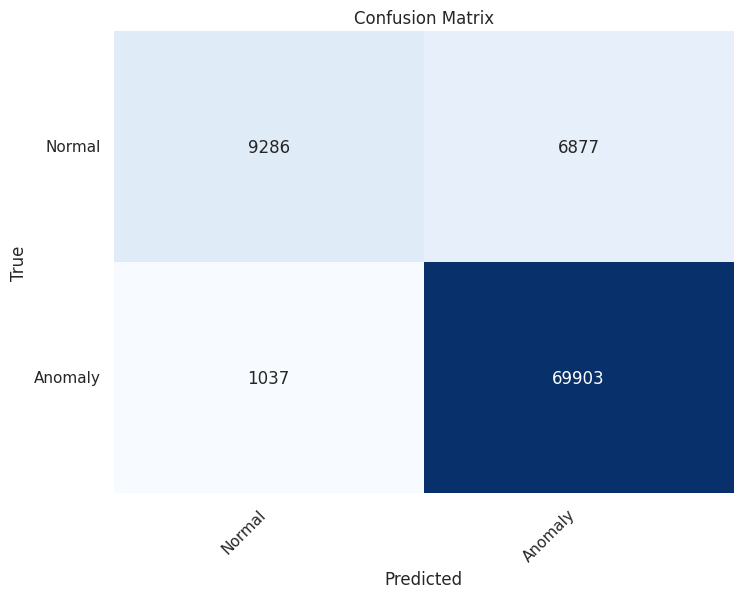

In [ ]:
## plotting the confusion matrix
cm = confusion_matrix(y_test, yLabel)
plot_confusion_matrix(np.array(cm), np.array(['Normal', 'Anomaly']))

# Explaining the predictions

In [ ]:
## Installing Lime and SHAP
!pip install lime shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 11.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 572.6/572.6 kB 47.0 MB/s eta 0:00:00
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283839 sha256=61ec0238160911c73f96b1ce238cc9b05f2d7ed7f39b86208a509921fd2cb310
  Stored in directory: /root/.cache/pip/wheels/fd/a2/af/9ac0a1a85a27f314a06b39e1f492bee1547d52549a4606ed89
Successfully built lime


## LIME

In [ ]:
## Getting the index of anomaly in the test set
idx_1 = np.where(np.array(yLabel) == 1)[0]
idx_2 = np.where(np.array(yLabel) == 0)[0]
test_point = idx_1[300]
print("Anomalous Index to test:", test_point)
print("Anomalous Index to test:", idx_2[50])

Anomalous Index to test: 318
Anomalous Index to test: 652


In [ ]:
## Code take from lime github page(https://github.com/thomasp85/lime)
## Imporing lime library
import lime
from lime import lime_tabular

## Craeting an instance for mode vae
instance = lime_tabular.LimeTabularExplainer(
    training_data = np.array(X_train),
    feature_names = feaNames,
    mode = 'regression'
)
## Converting tensor back to numpy array
X_test_Dummy = np.array(X_test)
exp = instance.explain_instance(data_row = X_test_Dummy[test_point, :],
predict_fn = vae.predict)

exp.show_in_notebook(show_table=True)

157/157 [==============================] - 0s 2ms/step


In [ ]:
## Explaination for normal instance
exp = instance.explain_instance(data_row = X_test_Dummy[idx_2[50], :],
predict_fn = vae.predict)

exp.show_in_notebook(show_table=True)

157/157 [==============================] - 1s 5ms/step


## SHAP

In [ ]:
## Conerting back to DataFrame
X_train = pd.DataFrame(X_train, columns = feaNames)
X_val = pd.DataFrame(X_val, columns = feaNames)
X_test = pd.DataFrame(X_test, columns = feaNames)

4/4 [==============================] - 0s 4ms/step


  0%|          | 0/200 [00:00<?, ?it/s]

6669/6669 [==============================] - 14s 2ms/step


Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.


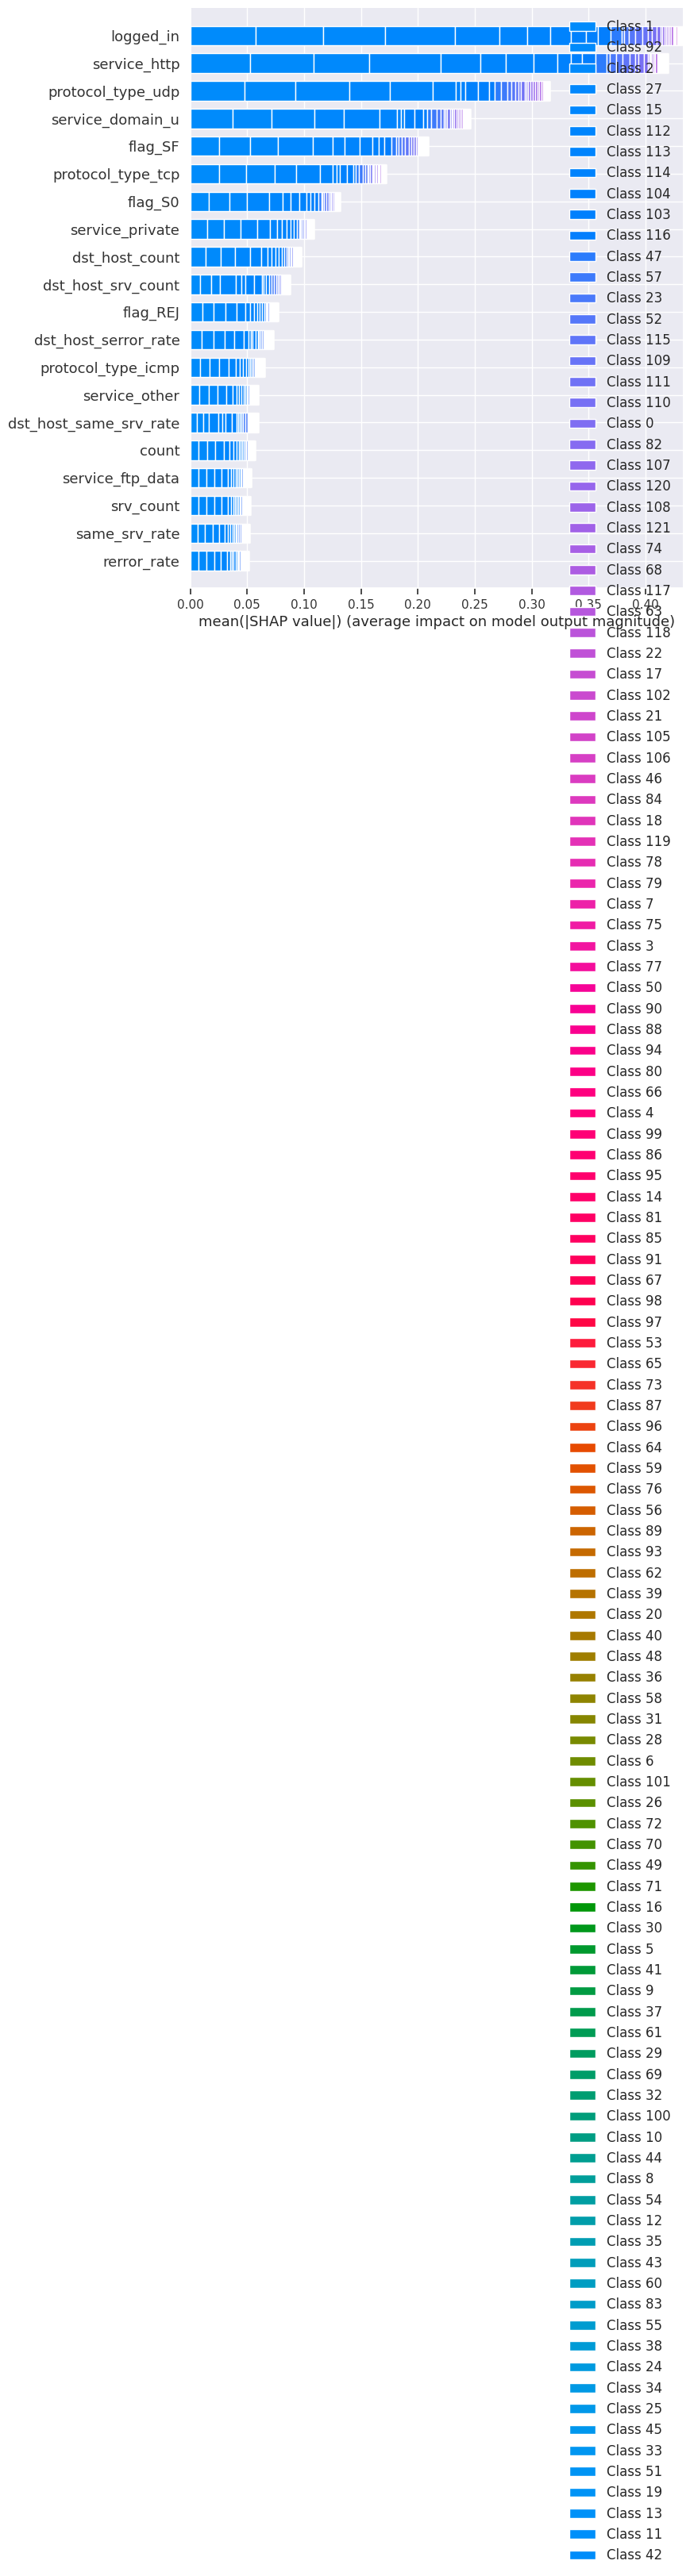

In [ ]:
## Code taken from SHAP github page (https://github.com/slundberg/shap)

## Importing shap and javascipt
import shap
shap.initjs()

## Function to predict the data using VAEs
def vae_predict(data):
    return vae.predict(data)

## Taking 100 samples for each point
backsamples = shap.sample(X_train, 100)
explainer = shap.KernelExplainer(vae_predict, backsamples)

# Compute SHAP values for test data
shap_values = explainer.shap_values(X_test.iloc[300:500, :])

# Interpret the SHAP values using SHAP summary plots
shap.summary_plot(shap_values, X_test.iloc[300:500, :])

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


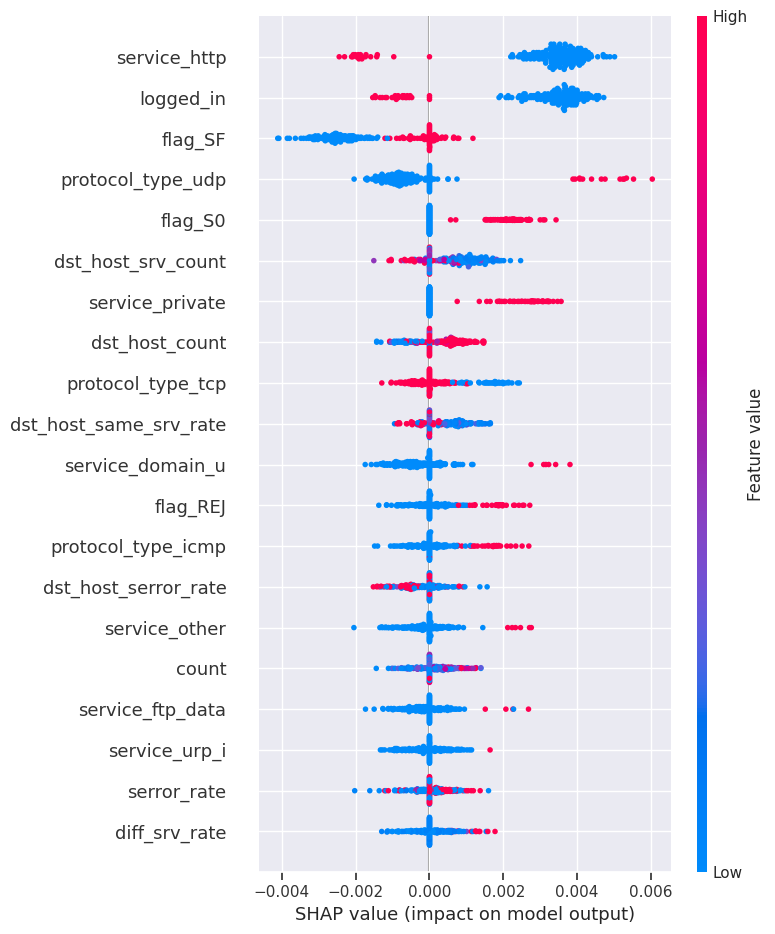

In [ ]:
## Summary plot
shap.summary_plot(shap_values[0], X_test.iloc[300:500,:])

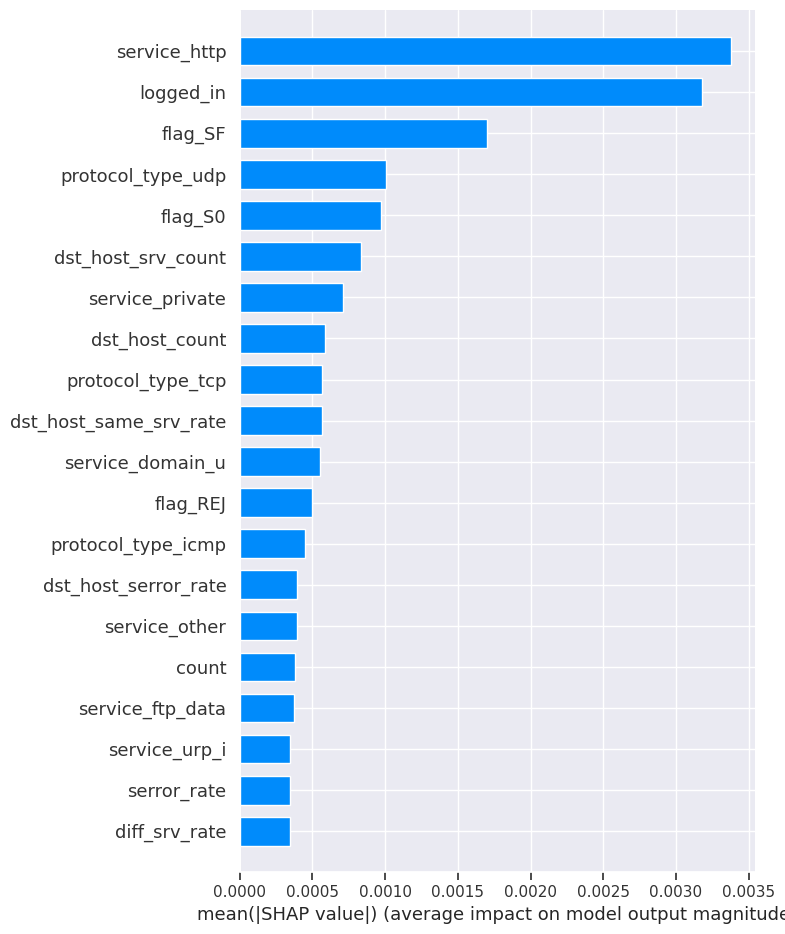

In [ ]:
## importing javascipt for visualizing the plot
shap.initjs()
## Summary plot
shap.summary_plot(shap_values[0], X_test.iloc[300:500,:], plot_type='bar')

# One-class SVM

In [ ]:
## Importing the necessary libraries for SVM
import pandas as pd
from sklearn.svm import OneClassSVM
from sklearn import svm
## Used this as refrence
## https://towardsdatascience.com/support-vector-machine-svm-for-anomaly
## -detection-73a8d676c331
## Creating a model
model = OneClassSVM(kernel = 'sigmoid', gamma = 0.5,
                    nu = 0.4).fit(X_train)
## Getting the predictions
y_pred = model.predict(X_test)

## Getting the outlier indicies
outlierIndicies = np.where(y_pred == -1)

yy_pred = np.zeros(X_test.shape[0])

# Marking the outliers as 1 in y_pred
yy_pred[outlierIndicies] = 1

## Printing the stats for predictions
Stats(yy_pred, y_test)

Accuracy = 0.8821050939692089
F1-score = 0.9289416323565028
Precision = 0.912307169554876
Recall = 0.9461939667324499
AUC-ROC = 0.7735053234021095


# Isolation forest

In [ ]:
## Used chatgpt as refrence
## Importing the Isolation forest
from sklearn.ensemble import IsolationForest

# Create an instance of the Isolation Forest model
clf = IsolationForest(n_estimators=100, contamination=0.4, random_state=42)

# Fit the model to your data
clf.fit(X_train)

# Predict the anomalies (outliers)
predicted_labels = clf.predict(X_test)
# Map the predicted labels to 0 for normal and 1 for anomaly
yy_pred = np.where(predicted_labels == 1, 0, 1)


# Getting Stats for your model
Stats(yy_pred, y_test)

X does not have valid feature names, but IsolationForest was fitted with feature names


Accuracy = 0.8473643373260269
F1-score = 0.9031598055504276
Precision = 0.9939054326296365
Recall = 0.827598359153639
AUC-ROC = 0.8982080145703231


# Unsupervised KNN

In [ ]:
## Converting tensor back to numpy arrays for better performance

## Concatenating
data = np.concatenate((X_train, X_val, X_test), axis=0)
y_data = np.concatenate((y_train, y_val, y_test), axis=0)

In [ ]:
## Combining the dataFrame
combData = np.concatenate((data, y_data.reshape(-1, 1)), axis=1)

## Reshuffling the data
np.random.shuffle(combData)


## Storing the Labels
yy = combData[:,-1]


## Removing the lables
data = combData[:, :-1]

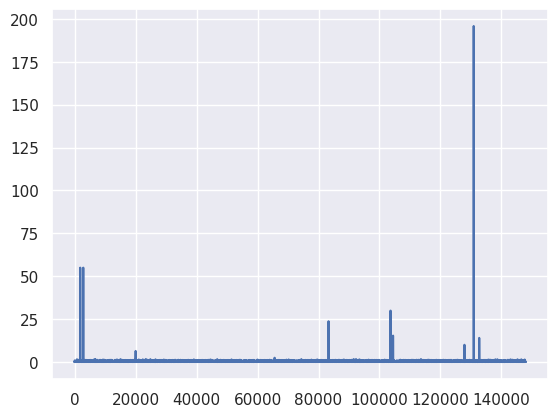

In [ ]:
## Refrence taken from
##https://towardsdatascience.com/k-nearest-neighbors-knn-for-anomaly-detection-fdf8ee160d13

## Importing the necessary libraries
from sklearn.neighbors import NearestNeighbors
from sklearn.datasets import make_blobs
import numpy as np
from sklearn.cluster import KMeans

## Initializing the model
nb = NearestNeighbors(n_neighbors = 7)

# fitting the model
nb.fit(data)

## getting the distance and indexex from the model
dist, indices = nb.kneighbors(data)

# plot mean of k-distances of each observation
plt.plot(dist.mean(axis = 1))

In [ ]:
# visually determine the threshold
outlierIndices = np.where(dist.mean(axis = 1) > 0.004)
## getting the indicies for outliers
#outlierIndices

In [ ]:
confidenceInterval_knn = np.percentile(dist.mean(axis = 1), [2.5, 97.5])

## Getting the outliers based on the threshold
outlierThreshold = confidenceInterval_knn[1]
print("Threshold for unsupervised KNN is(based on 95% confidence interval):", outlierThreshold)

Threshold for unsupervised KNN is(based on 95% confidence interval): 0.27298509893436423


In [ ]:
## Getting the indicies of the anomalies
outlierIndices = np.where(dist.mean(axis = 1) > 0.01)

In [ ]:
y_pred = np.zeros(data.shape[0])

# Marking the outliers as 1 in y_pred
y_pred[outlierIndices] = 1

## Printing the stats for predictions
Stats(y_pred, yy)

Accuracy = 0.5837328014603969
F1-score = 0.624062721344308
Precision = 0.5504723535811619
Recall = 0.7203653843442958
AUC-ROC = 0.5890824660982971
